#**Seattle Weather Analysis**

##Introduction:
The Seattle Weather dataset, sourced from Kaggle, provides detailed meteorological data collected over multiple years. It includes daily records of precipitation, temperature (maximum and minimum), wind speed, and general weather conditions. These features make it an ideal dataset for exploring weather trends, patterns, and relationships.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
#Load the dataset
df = pd.read_csv('/content/seattle-weather.csv')

In [10]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [11]:
#Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [12]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [13]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)


Number of Duplicates: 0


In [14]:
# Check summary statistics for numerical columns
Summary_Statistics = df.describe()
print("\nSummary_Statistics:\n", Summary_Statistics)


Summary_Statistics:
                       date  precipitation     temp_max     temp_min  \
count                 1461    1461.000000  1461.000000  1461.000000   
mean   2013-12-31 00:00:00       3.029432    16.439083     8.234771   
min    2012-01-01 00:00:00       0.000000    -1.600000    -7.100000   
25%    2012-12-31 00:00:00       0.000000    10.600000     4.400000   
50%    2013-12-31 00:00:00       0.000000    15.600000     8.300000   
75%    2014-12-31 00:00:00       2.800000    22.200000    12.200000   
max    2015-12-31 00:00:00      55.900000    35.600000    18.300000   
std                    NaN       6.680194     7.349758     5.023004   

              wind  
count  1461.000000  
mean      3.241136  
min       0.400000  
25%       2.200000  
50%       3.000000  
75%       4.000000  
max       9.500000  
std       1.437825  


##Data Visualizations:

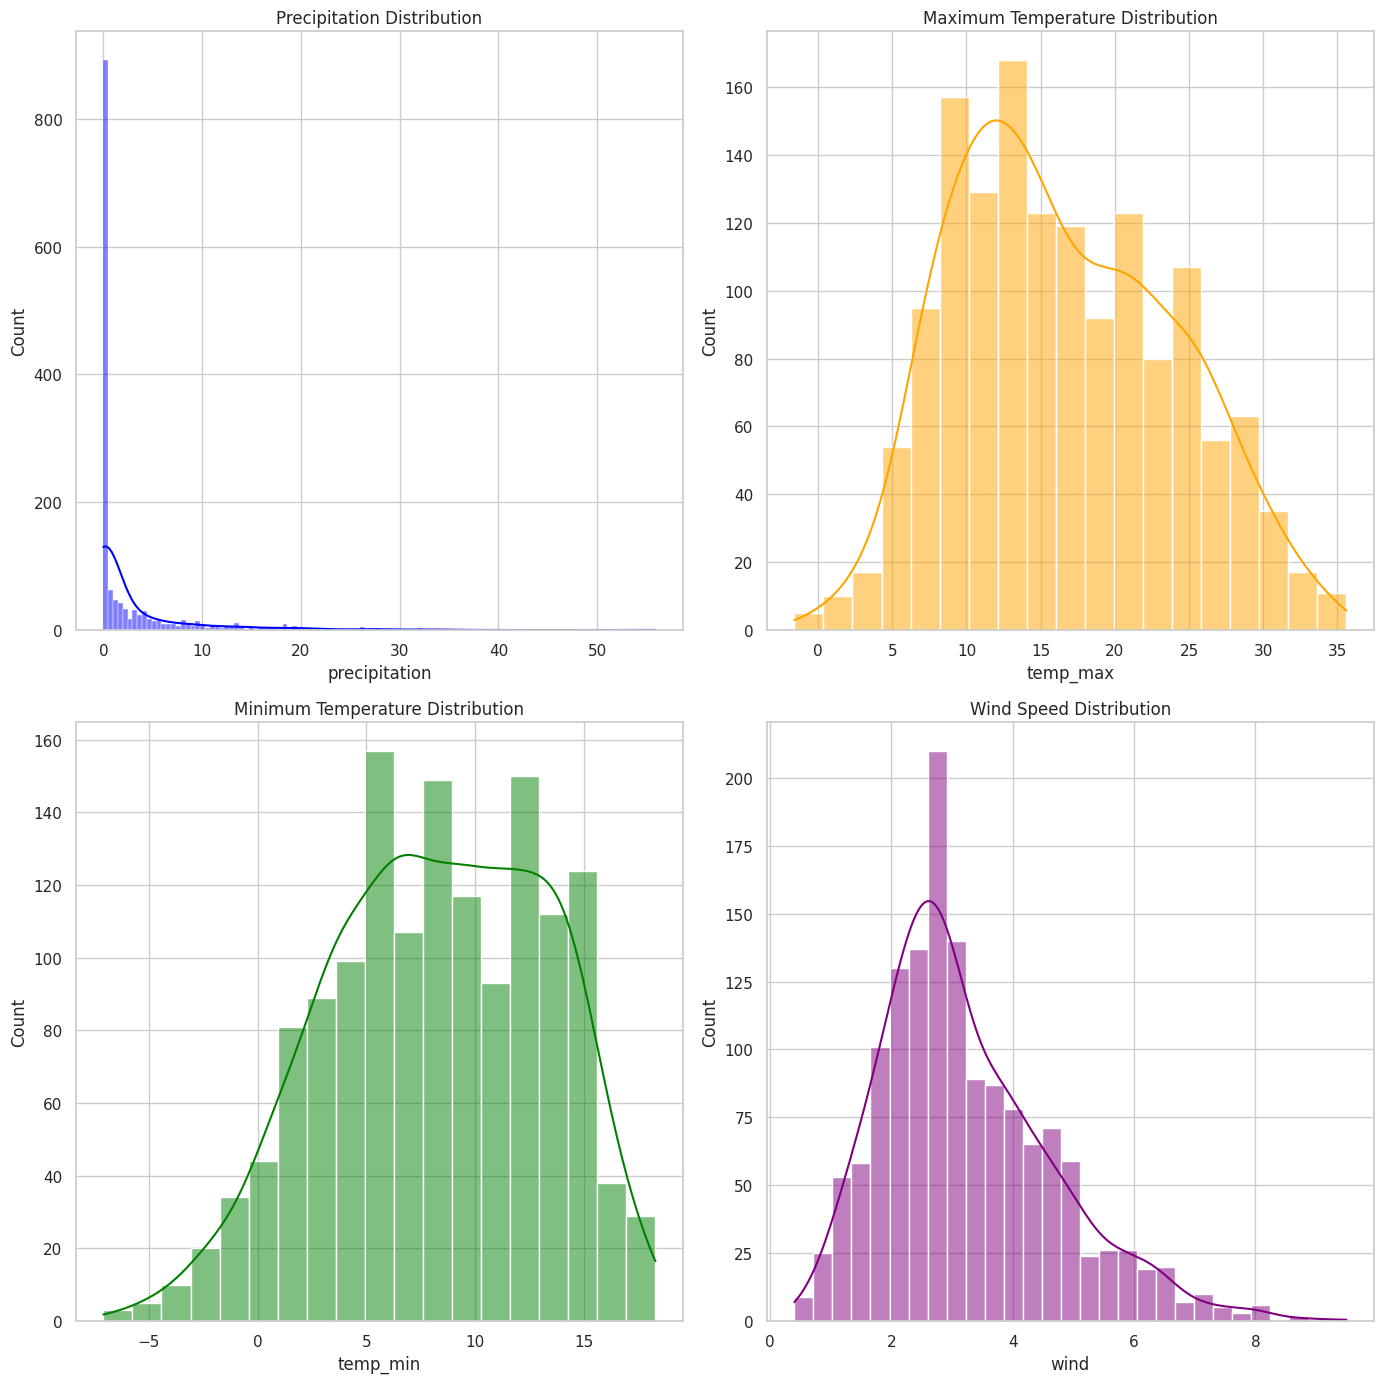

In [15]:
# Setting up the visual style
sns.set(style="whitegrid")

# Creating histograms for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Precipitation distribution
sns.histplot(df['precipitation'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Precipitation Distribution')

# Temperature max distribution
sns.histplot(df['temp_max'], kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Maximum Temperature Distribution')

# Temperature min distribution
sns.histplot(df['temp_min'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Minimum Temperature Distribution')

# Wind speed distribution
sns.histplot(df['wind'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

**1. Precipitation:**
The distribution is highly right-skewed, with most days having little to no precipitation.
A few days exhibit significantly high precipitation, indicating potential outliers or extreme weather events.

**2. Maximum Temperature (temp_max):**
The distribution appears approximately normal, centered around 10–15°C.
There is a slight tail toward higher temperatures, likely representing warmer days.

**3. Minimum Temperature (temp_min):**
The distribution is also close to normal but slightly left-skewed, with most values between 0°C and 15°C.
A few instances of sub-zero temperatures are present, indicating colder days.

**4. Wind Speed:**
The distribution is slightly right-skewed, with most wind speeds ranging from 1–5 m/s.
There are a few higher values, possibly representing windy days or storms.

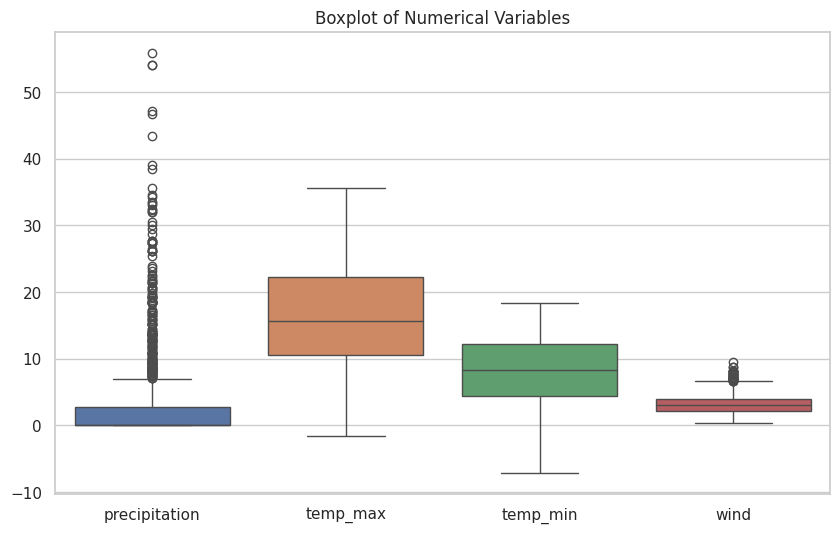

In [16]:
#Creating boxplots for additional insights
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df[['precipitation', 'temp_max', 'temp_min', 'wind']])
ax.set_title('Boxplot of Numerical Variables')
plt.show()

**Outliers:**
As we expected from the distribution of precipitation and wind, the box plots confirms that we are getting outliers. Next, we can look for any correlation between them.

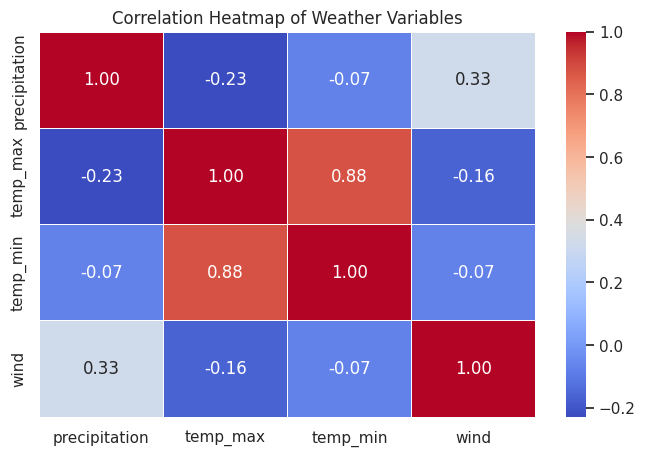

In [17]:
# Compute the correlation matrix
correlation_matrix = df[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Weather Variables')
plt.show()

**1. Temperature relationships:**
Maximum and minimum temperatures are strongly positively correlated (0.88), meaning they tend to rise and fall together.
Both temperature variables have a slight negative correlation with precipitation (-0.23 and -0.07), suggesting it's slightly less likely to rain on warmer days.


**2. Wind relationships:**
Wind has a moderate positive correlation with precipitation (0.33), meaning windier conditions are somewhat associated with more precipitation.
Wind has weak negative correlations with both temperature variables (-0.16 and -0.07), suggesting slightly less wind on warmer days.


The diagonal line shows 1.0 correlations because that's each variable correlated with itself.

##Time Series analysis

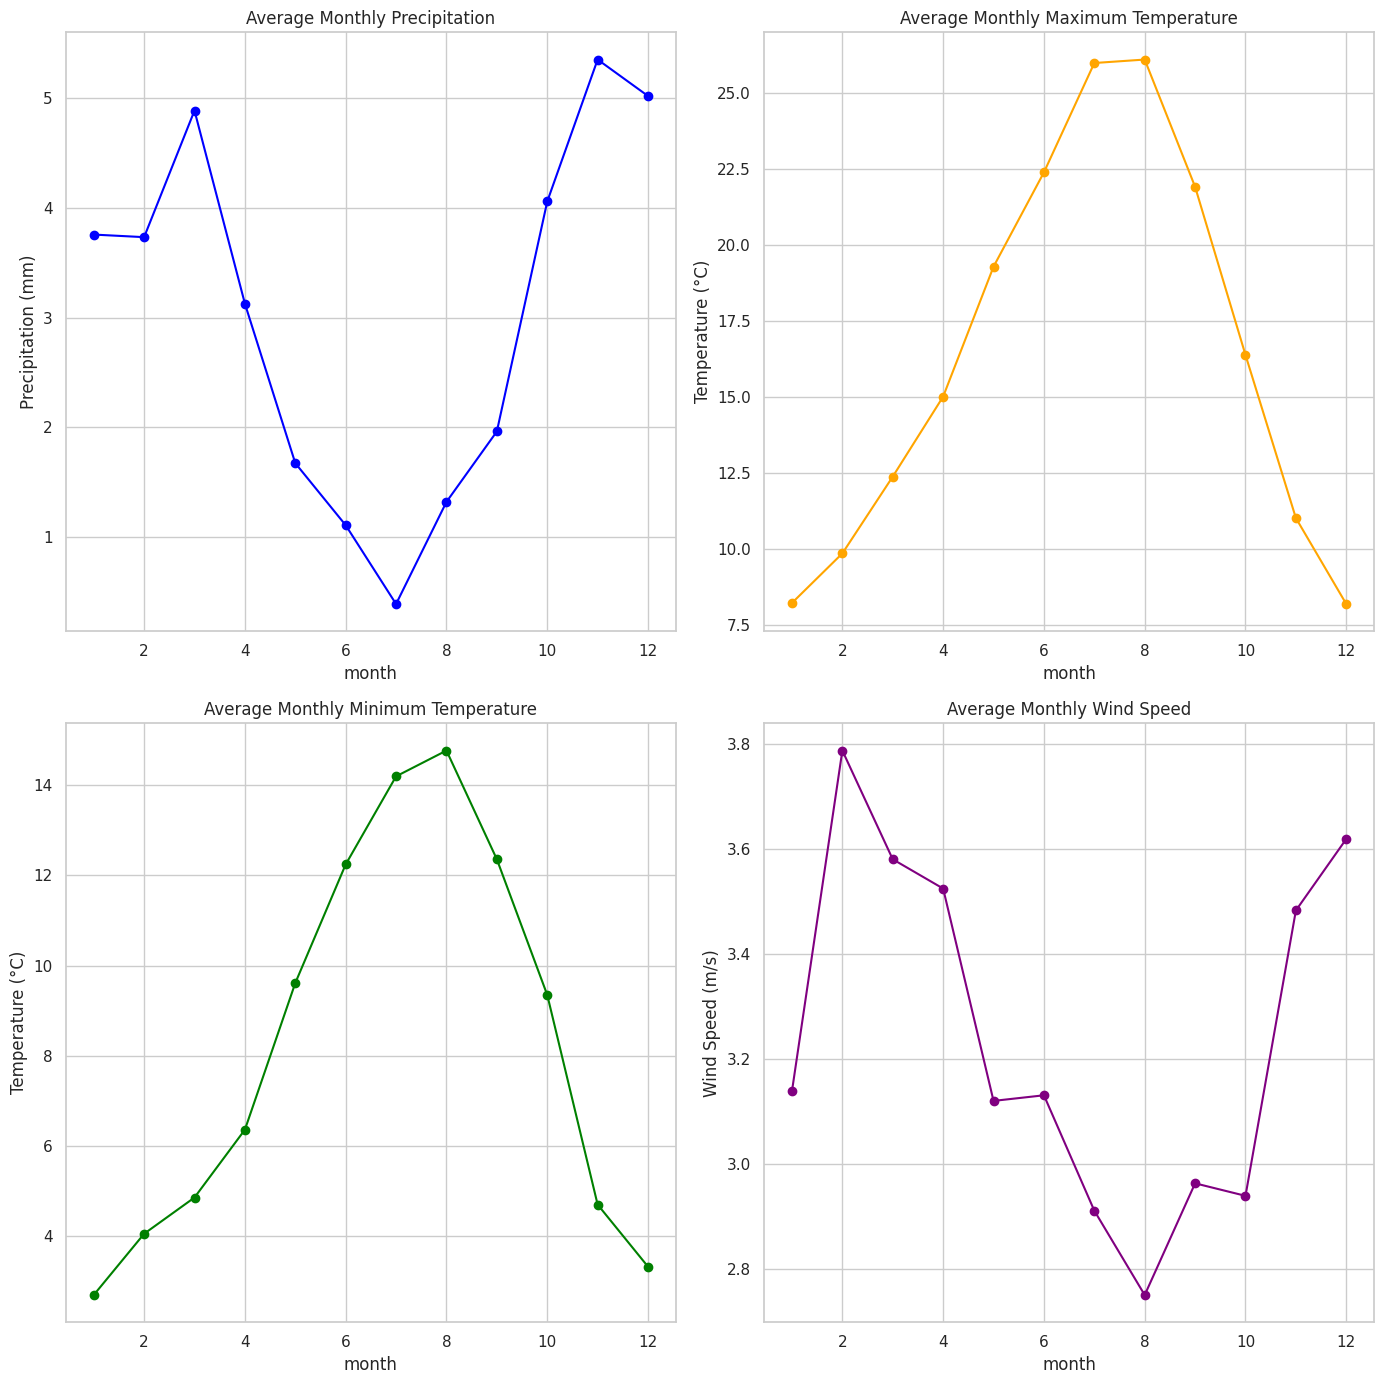

In [18]:
# Extract month from the date column
df['month'] = df['date'].dt.month

# Group data by month and calculate the mean for each variable
monthly_trends = df.groupby('month')[['precipitation', 'temp_max', 'temp_min', 'wind']].mean()

# Plot the monthly trends
fig, ax = plt.subplots(2, 2, figsize=(14, 14))

# Precipitation trend
monthly_trends['precipitation'].plot(ax=ax[0, 0], color='blue', marker='o')
ax[0, 0].set_title('Average Monthly Precipitation')
ax[0, 0].set_ylabel('Precipitation (mm)')

# Maximum temperature trend
monthly_trends['temp_max'].plot(ax=ax[0, 1], color='orange', marker='o')
ax[0, 1].set_title('Average Monthly Maximum Temperature')
ax[0, 1].set_ylabel('Temperature (°C)')

# Minimum temperature trend
monthly_trends['temp_min'].plot(ax=ax[1, 0], color='green', marker='o')
ax[1, 0].set_title('Average Monthly Minimum Temperature')
ax[1, 0].set_ylabel('Temperature (°C)')

# Wind speed trend
monthly_trends['wind'].plot(ax=ax[1, 1], color='purple', marker='o')
ax[1, 1].set_title('Average Monthly Wind Speed')
ax[1, 1].set_ylabel('Wind Speed (m/s)')

plt.tight_layout()
plt.show()

**1. Temperature Patterns:**
Clear seasonal cycle with peaks in summer (months 7-8).
Maximum temperatures reach about 26°C in summer, dropping to 8°C in winter
Minimum temperatures follow a similar pattern but about 10°C lower.

**2. Precipitation:**
Shows a bimodal pattern with two peaks: one in spring (month 3-4) and another in late fall (months 10-11).
Driest period is during summer (month 7).

**3. Wind Speed:**
Most variable pattern among all metrics.
Highest winds in late winter/early spring (month 2-3)
Calmest period in late summer (month 8).


- **Relationships:**
When temperatures are highest (summer), precipitation is lowest.
Wind speeds generally higher in colder months.
Temperature range (difference between max and min) remains fairly consistent throughout the year.

##Weather Condition Analysis:

In [19]:
# Frequency of each weather condition
weather_condition_counts = df['weather'].value_counts()

print("Weather Condition Counts:\n", weather_condition_counts)

Weather Condition Counts:
 weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


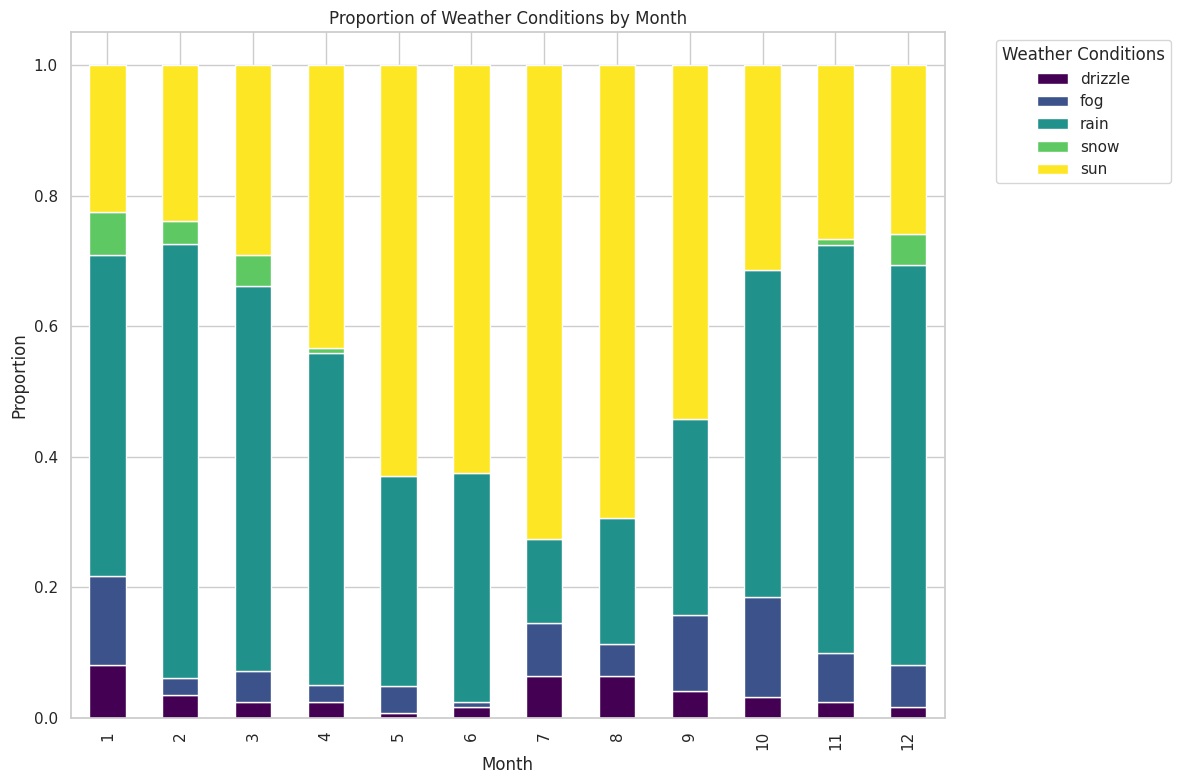

In [20]:
# Group weather conditions by month
monthly_weather = df.groupby(['month', 'weather']).size().unstack()

# Normalize to get proportions for each weather condition
monthly_weather_normalized = monthly_weather.div(monthly_weather.sum(axis=1), axis=0)

# Plot weather conditions across months
monthly_weather_normalized.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')
plt.title('Proportion of Weather Conditions by Month')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**1. Most Common Weather Conditions Overall:**
Sun (yellow) appears to be the most dominant condition.
Rain (teal) is the second most common.
Fog (blue) and drizzle (dark purple) occur less frequently.
Snow (light green) appears only in winter months.

**2. Seasonal Trends:**
Summer (months 6-8): Highest proportion of sunny days, minimal precipitation.
Winter (months 11-1): Most diverse weather mix, with all conditions present.
Spring/Fall: Gradual transition periods with increasing/decreasing rain.
Clear seasonal pattern where sunny conditions peak in summer and decrease in winter.

**3. Special patterns:**
Fog appears more prevalent in fall/winter months (October-January).
Despite being winter months, actual snow proportion is relatively small.
July and August show similar patterns but August has slightly more rain.
Drizzle occurs throughout the year but is most common in winter months.